# Step 4 - Evaluate Retrieved Results

This script is to evaluate retrieval results generated from the last step using two metrics. 

More info - 
Discounted Cumulative Gain: https://en.wikipedia.org/wiki/Discounted_cumulative_gain
Mean Reciprocal Rank: https://en.wikipedia.org/wiki/Mean_reciprocal_rank.

Input:
1. game - game name
2. folder - working path of the following files
3. database file
4. answer file - a json file with all the correct answers as the ground truth
5. result file - a list of result files

Output:
1. score based on MRR and nDCG, larger value means better results.
2. a png file with a plot

In [1]:
%pylab inline
import os
import json
from evaluation import Evaluation_MRR, Evaluation_nDCG


Populating the interactive namespace from numpy and matplotlib


In [2]:
"""
Make sure these variables are correctly set.
model: file path to pretrained model
database_file: file path to database file generated from previous steps
answer_file: file path to answer file
result_file: an list of result files
"""
game = "The Last Of Us"
folder = './visualization/backend/datasource/The Last Of Us/output/'
database_file = 'The_Last_Of_Us_top3keywords.json'
answer_file = 'correct_answers.json'
result_file = ['embeddings_results.json',
               'embeddings_img_results.json',
               'embeddings_cap_results.json',
               'embeddings_cap_ma3_results.json',
               'embeddings_cap_ma5_results.json',
               'embeddings_cap_ma7_results.json',
               'embeddings_img_cap_results.json',
               'embeddings_img_cap_ma3_results.json',
               'embeddings_img_cap_ma5_results.json',
               'embeddings_img_cap_ma7_results.json',
               'embeddings_img_cap_ma9_results.json']

database = os.path.join(folder, database_file)
answer = os.path.join(folder, answer_file)
output_chart = os.path.join(folder, game + '.png')

In [3]:
tester0 = Evaluation_MRR(database)
mrr_scores = []
for idx, file in enumerate(result_file):
    print(f'\nEvaluating result file: {file}\n')
    result = os.path.join(folder, file)
    score = tester0.evaluation_mean_rec_rank(result, answer)
    mrr_scores.append(score)
    print(f'MRR: {score}')
mrr_sorted_scores = [(index, value) for (index, value) in sorted(enumerate(mrr_scores), key=lambda k: k[1])]
print(f'\nLowest Performance:\n score = {mrr_sorted_scores[0][1]}, \n result = {result_file[mrr_sorted_scores[0][0]]}\n')
print(f'\nHighest Performance:\n score = {mrr_sorted_scores[-1][1]}, \n result = {result_file[mrr_sorted_scores[-1][0]]}\n')


Evaluating result file: embeddings_results.json

number of results: 14
query: daughter got shot dead
query: fireflies
query: giraffe
query: infected girl
query: clickers are hear
query: brother tommy
query: Ellie riding a horse
query: weapon bow and arrow
query: it is over Tess
query: Sam turned Henry gun
query: Rabbit
query: Ellie jump bridge
query: remove brain vaccine
query: help rifle BB rats
MRR: 0.0

Evaluating result file: embeddings_img_results.json

number of results: 14
query: daughter got shot dead
query: fireflies
******Hit! Found an answer at rank 1!******
query: giraffe
******Hit! Found an answer at rank 5!******
query: infected girl
query: clickers are hear
query: brother tommy
query: Ellie riding a horse
******Hit! Found an answer at rank 1!******
query: weapon bow and arrow
******Hit! Found an answer at rank 6!******
query: it is over Tess
query: Sam turned Henry gun
query: Rabbit
******Hit! Found an answer at rank 1!******
query: Ellie jump bridge
query: remove brain

In [4]:
tester1 = Evaluation_nDCG(database)
ndcg_scores = []
for idx, file in enumerate(result_file):
    print(f'\nEvaluating result file: {file}\n')
    result = os.path.join(folder, file)
    score = tester1.evaluation_mean_nDCG(result, answer)
    ndcg_scores.append(score)
    print(f'DCG: {score}')
ndcg_sorted_scores = [(index, value) for (index, value) in sorted(enumerate(ndcg_scores), key=lambda k: k[1])]
print(f'\nLowest Performance:\n score = {ndcg_sorted_scores[0][1]}, \n result = {result_file[ndcg_sorted_scores[0][0]]}\n')
print(f'\nHighest Performance:\n score = {ndcg_sorted_scores[-1][1]}, \n result = {result_file[ndcg_sorted_scores[-1][0]]}\n') 


Evaluating result file: embeddings_results.json

query: daughter got shot dead
DCG=0.0, IDCG=4.543559338088346
query: fireflies
DCG=0.0, IDCG=4.543559338088346
query: giraffe
DCG=0.0, IDCG=4.543559338088346
query: infected girl
DCG=0.0, IDCG=4.543559338088346
query: clickers are hear
DCG=0.0, IDCG=4.543559338088346
query: brother tommy
DCG=0.0, IDCG=2.1309297535714578
query: Ellie riding a horse
DCG=0.0, IDCG=4.543559338088346
query: weapon bow and arrow
DCG=0.0, IDCG=4.543559338088346
query: it is over Tess
DCG=0.0, IDCG=4.543559338088346
query: Sam turned Henry gun
DCG=0.0, IDCG=4.543559338088346
query: Rabbit
DCG=0.0, IDCG=4.543559338088346
query: Ellie jump bridge
DCG=0.0, IDCG=4.543559338088346
query: remove brain vaccine
DCG=0.0, IDCG=4.543559338088346
query: help rifle BB rats
DCG=0.0, IDCG=4.543559338088346
DCG: 0.0

Evaluating result file: embeddings_img_results.json

query: daughter got shot dead
DCG=0.0, IDCG=4.543559338088346
query: fireflies
******Hit! Found an answer at 

DCG=0.0, IDCG=4.543559338088346
query: brother tommy
DCG=0.0, IDCG=2.1309297535714578
query: Ellie riding a horse
******Hit! Found an answer at rank 1!******
******Hit! Found an answer at rank 2!******
******Hit! Found an answer at rank 4!******
******Hit! Found an answer at rank 9!******
DCG=2.362636307308832, IDCG=4.543559338088346
query: weapon bow and arrow
******Hit! Found an answer at rank 4!******
******Hit! Found an answer at rank 6!******
DCG=0.7868837451814152, IDCG=4.543559338088346
query: it is over Tess
******Hit! Found an answer at rank 2!******
******Hit! Found an answer at rank 3!******
******Hit! Found an answer at rank 4!******
******Hit! Found an answer at rank 5!******
******Hit! Found an answer at rank 6!******
DCG=2.3046663059874146, IDCG=4.543559338088346
query: Sam turned Henry gun
******Hit! Found an answer at rank 4!******
******Hit! Found an answer at rank 5!******
******Hit! Found an answer at rank 6!******
******Hit! Found an answer at rank 7!******
******H

DCG=2.917813498752873, IDCG=4.543559338088346
DCG: 0.333184681351764

Evaluating result file: embeddings_img_cap_ma3_results.json

query: daughter got shot dead
DCG=0.0, IDCG=4.543559338088346
query: fireflies
******Hit! Found an answer at rank 1!******
******Hit! Found an answer at rank 4!******
******Hit! Found an answer at rank 11!******
DCG=1.4306765580733931, IDCG=4.543559338088346
query: giraffe
DCG=0.0, IDCG=4.543559338088346
query: infected girl
******Hit! Found an answer at rank 1!******
******Hit! Found an answer at rank 2!******
******Hit! Found an answer at rank 3!******
******Hit! Found an answer at rank 6!******
DCG=2.48713694067948, IDCG=4.543559338088346
query: clickers are hear
******Hit! Found an answer at rank 7!******
******Hit! Found an answer at rank 8!******
******Hit! Found an answer at rank 9!******
DCG=0.9498282057830434, IDCG=4.543559338088346
query: brother tommy
******Hit! Found an answer at rank 1!******
******Hit! Found an answer at rank 5!******
DCG=1.38

DCG=0.31546487678572877, IDCG=4.543559338088346
query: remove brain vaccine
******Hit! Found an answer at rank 1!******
******Hit! Found an answer at rank 2!******
******Hit! Found an answer at rank 3!******
******Hit! Found an answer at rank 4!******
******Hit! Found an answer at rank 5!******
******Hit! Found an answer at rank 6!******
******Hit! Found an answer at rank 7!******
DCG=3.637999639320748, IDCG=4.543559338088346
query: help rifle BB rats
******Hit! Found an answer at rank 1!******
******Hit! Found an answer at rank 2!******
******Hit! Found an answer at rank 3!******
******Hit! Found an answer at rank 4!******
******Hit! Found an answer at rank 5!******
******Hit! Found an answer at rank 6!******
******Hit! Found an answer at rank 7!******
******Hit! Found an answer at rank 8!******
******Hit! Found an answer at rank 9!******
******Hit! Found an answer at rank 10!******
DCG=4.543559338088346, IDCG=4.543559338088346
DCG: 0.39312873570015416

Evaluating result file: embeddi

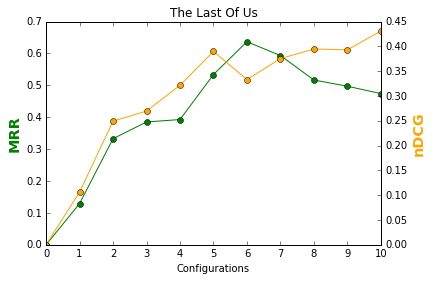

In [5]:
x = range(len(result_file))
y1 = mrr_scores
y2 = ndcg_scores

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, color='green', marker='o')
ax2.plot(x, y2, color='orange', marker='o')

ax1.set_xlabel('Configurations')
ax1.set_ylabel('MRR', color='g', fontsize='x-large', fontweight='bold')
ax2.set_ylabel('nDCG', color='orange', fontsize='x-large', fontweight='bold')

plt.xticks(x)
plt.title(game)
plt.savefig(output_chart, dpi=100, bbox_inches='tight')
plt.show()


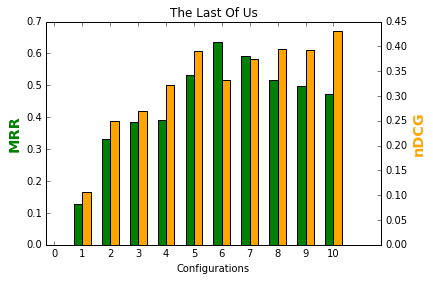

In [6]:
# bar chart
x = np.arange(len(result_file))
y1 = mrr_scores
y2 = ndcg_scores
bar_width = 0.3
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, bar_width, color='green', label='MRR')
ax2.bar(x+bar_width, y2, bar_width, color='orange', label='nDCG')

ax1.set_xticks(x+bar_width)
ax1.set_xticklabels(x)
ax1.set_xlabel('Configurations')
ax1.set_ylabel('MRR', color='g', fontsize='x-large', fontweight='bold')
ax2.set_ylabel('nDCG', color='orange', fontsize='x-large', fontweight='bold')

# plt.xticks(x)
plt.title(game)
plt.savefig(output_chart, dpi=100, bbox_inches='tight')
plt.show()